# Recheche d'information TME
## Da JU

In [1]:
# import dependency
%load_ext autoreload
%autoreload 2
%matplotlib inline
from Index import *
from QueryParser import *
from evaluation.EvalMeasure import *
from models.IRmodel import  *
from models.Weighter import  *
from models.LanguageModel import *
from models.Okapi import  *
import numpy as np
from evaluation.GridSearch import *
from models.RandomModel import *
from collection.PageRank import *
from collection.Hits import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from pylab import *
from features.FeatureIRmodel import *
from features.FeatureList import *
from models.MetaModelLinear import *
from evaluation.AccuracyRecall import *
def printf(format, *args):
    sys.stdout.write(format % args)

## Load test query set and corpus
The queries will be sorted in irlist. 

In [6]:
index = Index("text")
index.indexation('cacm/cacm.txt', './test/')
parser = QueryParser()
parser.initFile('cacm/cacm.qry', 'cacm/cacm.rel')
irlists = []
query = parser.nextQuery()
while query != None:
    irlists.append(IRList(query))
    query = parser.nextQuery()

In [7]:
index.getTfsForDoc(1)

{'algebra': 1,
 'intern': 1,
 'languag': 1,
 'perli': 1,
 'preliminari': 1,
 'report': 1,
 'samelson': 1}

The index is working normally as expected.

## Weighters
As described in the suject, 5 types of weighterVector are implemnted.
* weighter1  $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = 1 \ si \  t\in q, 0 \ if \ not $
* weighter2  $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = tf_{t, q}$
* weighter3 $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = idf_{t} \ si \ t\in q, 0 \ if \ not $
* weighter4  $w_{t, d} = 1 \ + log(tf_{t,d}) \ if \ t\in d \ 0 \ if \ not \ and \ w_{t,q} = idf_{t} \ si \ t\in q, 0 \ if \ not $
* wighter5  $w_{t, d} = (1 \ + log(tf_{t,d})) \times idf_{t} \ if \ t\in d \ 0 \ if \ not \ and \ w_{t,q} = (1 \ + log(tf_{t})) \times idf_{t} \ si \ t\in q, 0 \ if \ not $

In [8]:
weighter1 = WeighterVector1(index)
weighter2 = WeighterVector2(index)
weighter3 = WeighterVector3(index)
weighter4 = WeighterVector4(index)
weighter5 = WeighterVector5(index)

In [29]:
print (weighter1.getDocWeightsForDoc(1))
print (weighter1.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1, 'ibm': 1, 'deal': 1, 'share': 1, 'articl': 1, 'exist': 1, 'operat': 1, 'time': 1, 'tss': 1}


In [30]:
print (weighter2.getDocWeightsForDoc(1))
print (weighter2.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1, 'ibm': 1, 'deal': 1, 'share': 1, 'articl': 1, 'exist': 1, 'operat': 1, 'time': 1, 'tss': 1}


In [31]:
print (weighter3.getDocWeightsForDoc(1))
print (weighter3.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


In [32]:
print (weighter4.getDocWeightsForDoc(1))
print (weighter4.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1.0, 'algebra': 1.0, 'preliminari': 1.0, 'perli': 1.0, 'intern': 1.0, 'report': 1.0, 'languag': 1.0}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


In [33]:
print (weighter5.getDocWeightsForDoc(1))
print (weighter5.getWeightsForQuery(irlists[0].query.text))

{'samelson': 3.9660845914055547, 'algebra': 3.6538426614881265, 'preliminari': 3.8576378639472444, 'perli': 4.037546953962178, 'intern': 3.7943729704892277, 'report': 3.607094402296647, 'languag': 2.638803262023985}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


## Vector model
The vector model is based on a weighter and can perfrom the research. we take a model based on weighter 1 for exemple.

In [10]:
model = IRmodelVector(weighter1)
result = model.getRanking(irlists[0].query.text)
result[0]

(1938, 17)

# Precision-recall
We use the famous Precision-recall method to evaluate our model based on 5 weighters. We draw 10 points for the first query as an exemple.

(2923, 14)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


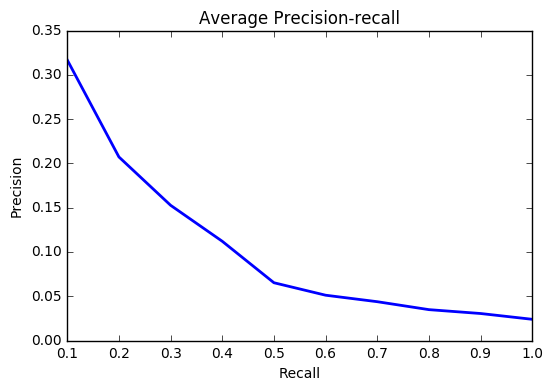

In [12]:
irlists[10].list = model.getRanking(irlists[10].query.text)
print(irlists[10].list[0])
rater_test = AccuracyRecall(10)
avg = np.zeros(10)
count = 0
# average p-recall
for each in irlists:
    each.list = model.getRanking(each.query.text)
    scores = rater_test.eval(each)
    if scores == None:
        continue
    avg += scores
    count += 1
avg = avg / count
    

x = []
y = []
for  i in range(1,11,1):
    j =i/10.
    y.append(avg[i-1])
    x.append(j)
plt.plot(x, y, linewidth=2.0)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Average Precision-recall")
plt.show()

In [12]:
rater = AP(20)
printf("The AP of model with query 10 is : %f", rater.eval(irlists[10]))

The AP of model with query 10 is : 0.258271

## Evaluation plateform
In this section, we use ap as mesure. we will mesure the performance of five different weighters with vector model

In [34]:
models = []
models.append(IRmodelVector(weighter1))
models.append(IRmodelVector(weighter2))
models.append(IRmodelVector(weighter3))
models.append(IRmodelVector(weighter4))
models.append(IRmodelVector(weighter5))
eval = EvalIRModel(models, irlists, 10)
scores_mean_1, scores_std_1 = eval.evalModels()

In [37]:
scores_std_1

[0.14064478206308048,
 0.13981133036677854,
 0.16250619090854626,
 0.16853807204363594,
 0.1684738274879671]

(0.04, 0.12)

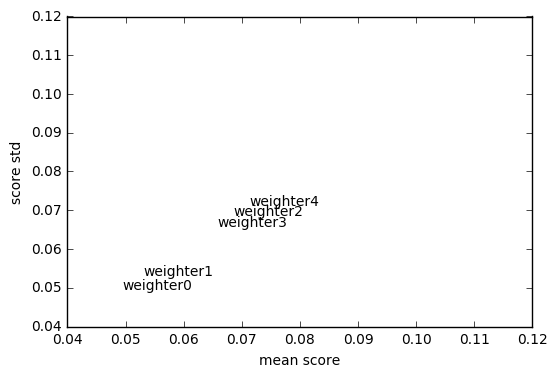

In [49]:
txt = 'weighter'
fig, ax = plt.subplots()
for i in range(5):
    ax.annotate(txt + str(i), (scores_mean_1[i],scores_mean_1[i]))
plt.xlabel('mean score')
plt.ylabel('score std')
ylim([0.04, 0.12])
xlim([0.04, 0.12])

We can see, each time the model gets better.

## Language model & Okapi
for each model, we will perfrom a grid search in order to find the optimum. These models will combine with weighter2.


In [10]:
models = []
models.append(LanguageModel(weighter2, 0.1))
models.append(Okapi(weighter2, 1.5 ,0.75))
eval = EvalIRModel(models, irlists, 20)
scores_mean, scores_std = eval.evalModels()

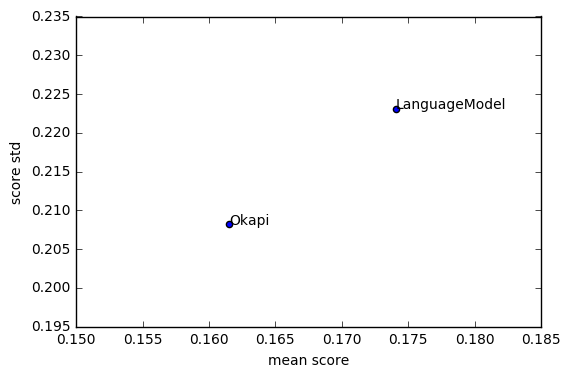

In [11]:
n = ['LanguageModel', 'Okapi']
fig, ax = plt.subplots()
for i, txt in enumerate(n):
    ax.annotate(txt, (scores_mean[i],scores_std[i]))
plt.scatter(scores_mean, scores_std)
plt.xlabel('mean score')
plt.ylabel('score std')

### Grid Search
for lam from 0 - 0.99 in language model

In [18]:
models = []
lams = np.linspace(0, 0.99, 5)
for lam in lams:
    models.append(LanguageModel(weighter2, lam))
search = GridSearch(models, irlists, 10)
print (search.optimisation())

0.33


The best parameter is lambda = 0.33

In [12]:
models = []
bs = np.linspace(0, 0.99, 5)
k1s = np.linspace(1.01, 1.99, 5)
for b in bs:
    for k1 in k1s:
        models.append(Okapi(weighter2, b ,k1))
search = GridSearch(models, irlists, 10)
print (search.optimisation())

(1.01, 0.98999999999999999)


In [14]:
np.max(search.scores_mean)

0.12321924859989439

The best parameters in language model is 0.33, and for Okapi is b = 0.98 and k1 = 1.01

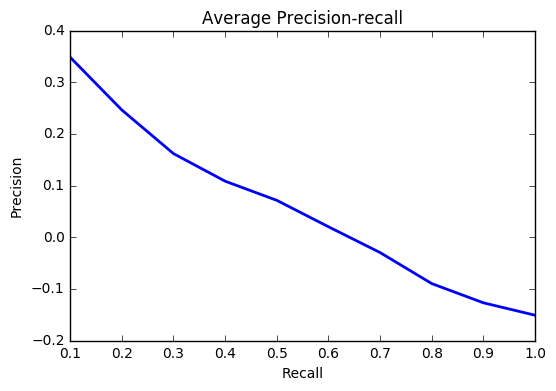

In [62]:
models = []
models.append(LanguageModel(weighter2, 0.33))
count = 0
avg_m = np.zeros(10)
for each_model in models:
    rater_test = AccuracyRecall(10)
    avg_m = np.zeros(10)
    # average p-recall
    for each in irlists:
        each.list = each_model.getRanking(each.query.text)
        scores = rater_test.eval(each)
        if isinstance(scores, list):
            avg_m += scores
            count += 1
    avg_m = avg_m / count


    x = []
    y = []
    for  i in range(1,11,1):
        j =i/10.
        y.append(avg_m[i-1])
        x.append(j)
    plt.plot(x, y, linewidth=2.0)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Average Precision-recall")
    plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


()


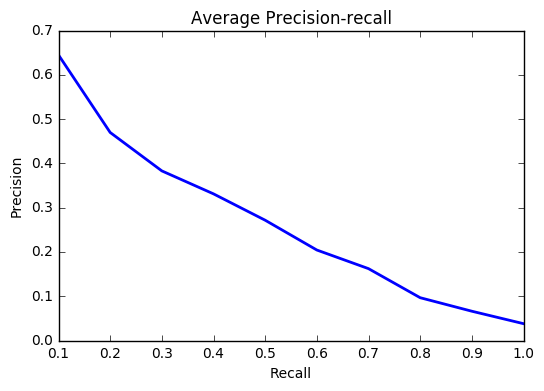

In [93]:
models = []
models.append(Okapi(weighter2, 0.98 ,1.01))
count = 0
avg_o = np.zeros(10)
for each in irlists:
    each.list = each_model.getRanking(each.query.text)
    scores = rater_test.eval(each)
    if scores == None:
        continue
    avg_o += scores
    count += 1
avg_o = avg_o / count

plt.plot(x, avg_o, linewidth=2.0)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Average Precision-recall")
plt.show()

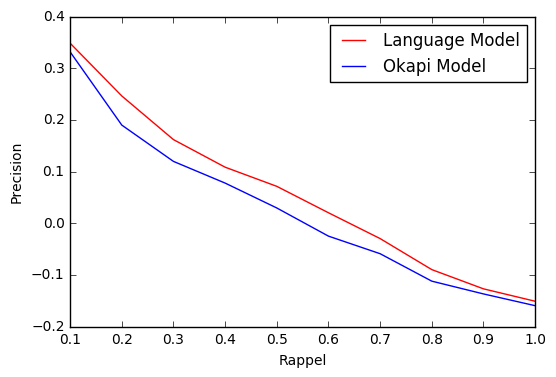

In [76]:
x = []
for  i in range(1,11,1):
        j =i/10.
        x.append(j)
    
plt.plot(x, avg_m, 'r',label = 'Language Model' )
plt.plot(x, avg_o, 'b',label = 'Okapi Model' )
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()

##  Page Rank & HITS
We take Okapi as an exemple because it is quick and accurate

In [20]:
model = Okapi(weighter2, 0.98 ,1.01)
irlists[10].list = model.getRanking(irlists[10].query.text)
rater = PresitionRappel(20)
scores_1 = rater.eval(irlists[10])
scores_1 = sorted(scores_1.items(), key=operator.itemgetter(0))
# page rank
page_rank = PageRank(0.1, 100, index)
model = RandomModel( Okapi(weighter2, 0.98 ,1.01), page_rank, 10, 10)
irlists[10].list = model.getRanking(irlists[10].query.text)
scores_2 = rater.eval(irlists[10])
scores_2 = sorted(scores_2.items(), key=operator.itemgetter(0))
# hits
hits = Hits(100, index)
model = RandomModel( Okapi(weighter2, 0.98 ,1.01), hits, 10, 10)
irlists[10].list = model.getRanking(irlists[10].query.text)
scores_3 = rater.eval(irlists[10])
scores_3 = sorted(scores_3.items(), key=operator.itemgetter(0))


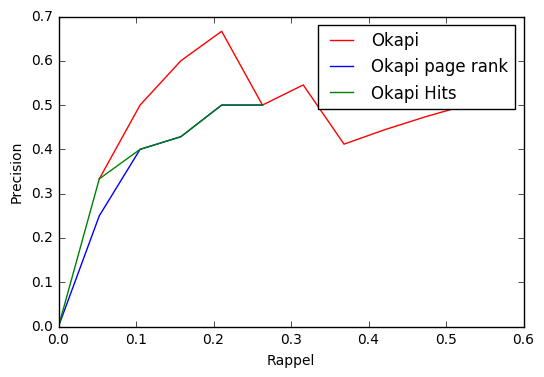

In [22]:
recall = [x[0] for x in scores_1]
pre = [x[1] for x in scores_1]
plt.plot(recall, pre, 'r',label = 'Okapi' )
recall = [x[0] for x in scores_2]
pre = [x[1] for x in scores_2]
plt.plot(recall, pre, 'b',label = 'Okapi page rank' )
recall = [x[0] for x in scores_3]
pre = [x[1] for x in scores_3]
plt.plot(recall, pre, 'g',label = 'Okapi Hits' )
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()

In [79]:
models = []
models.append(Okapi(weighter2, 0.98 ,1.01))
page_rank = PageRank(0.1, 100, index)
models.append(RandomModel( Okapi(weighter2, 0.98 ,1.01), page_rank, 20, 20))
hits = Hits(100, index)
models.append(RandomModel( Okapi(weighter2, 0.98 ,1.01), hits, 20, 20))
scores_random = []
for each_model in models:
    rater_test = AccuracyRecall(10)
    avg_r = np.zeros(10)
    # average p-recall
    count = 0
    for each in irlists:
        each.list = each_model.getRanking(each.query.text)
        scores = rater_test.eval(each)
        if scores == None:
            continue
        avg_r += scores
        count += 1
    scores_random.append(avg_r / count)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


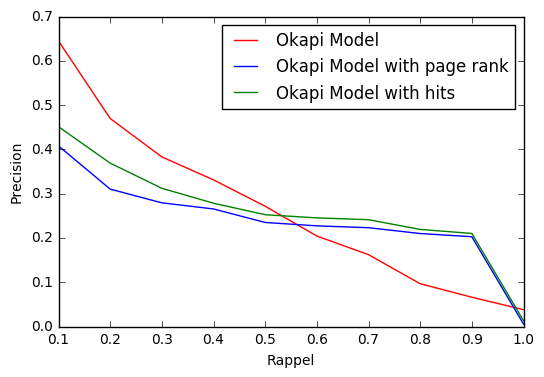

In [82]:
plt.plot(x, scores_random[0], 'r',label = 'Okapi Model' )
plt.plot(x, scores_random[1], 'b',label = 'Okapi Model with page rank' )
plt.plot(x, scores_random[2], 'g',label = 'Okapi Model with hits' )
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()

In [26]:
models = []
models.append(Okapi(weighter2, 0.98 ,1.01))
models.append(RandomModel( Okapi(weighter2, 0.98 ,1.01), page_rank, 20, 20))
models.append(RandomModel( Okapi(weighter2, 0.98 ,1.01), hits, 20, 20))
eval = EvalIRModel(models, irlists, 20)
scores_mean_o, scores_std_o = eval.evalModels()

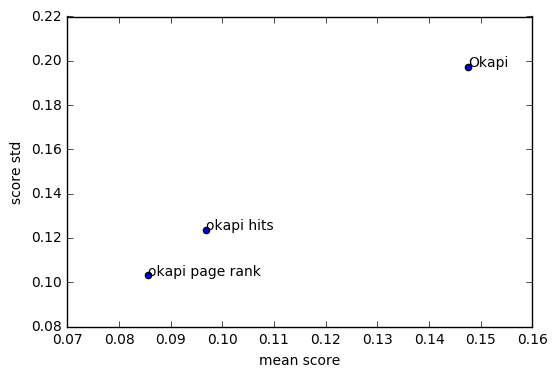

In [28]:
# with k = 20, d = 20
n = ['Okapi', 'okapi page rank', 'okapi hits']
fig, ax = plt.subplots()
for i, txt in enumerate(n):
    ax.annotate(txt, (scores_mean_o[i],scores_std_o[i]))
plt.scatter(scores_mean_o, scores_std_o)
plt.xlabel('mean score')
plt.ylabel('score std')

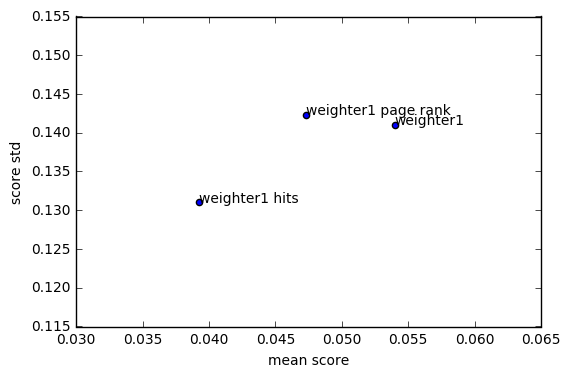

In [29]:
models = []
models.append(IRmodelVector(weighter1))
models.append(RandomModel( IRmodelVector(weighter1), page_rank, 10, 10))
models.append(RandomModel( IRmodelVector(weighter1), hits, 10, 10))
eval = EvalIRModel(models, irlists, 20)
scores_mean_o, scores_std_o = eval.evalModels()
# with k = 10, d = 10
n = ['weighter1', 'weighter1 page rank', 'weighter1 hits']
fig, ax = plt.subplots()
for i, txt in enumerate(n):
    ax.annotate(txt, (scores_mean_o[i],scores_std_o[i]))
plt.scatter(scores_mean_o, scores_std_o)
plt.xlabel('mean score')
plt.ylabel('score std')

As we can see, in both okapi and vector model, this does not help

## Features
Several features are implemted. Because the feature need to be with in [0, 1], so we choose to use the feature with predicted scores who can naturally follow this rule.


In [5]:
features = Fearurelist()
features.addFeature(FeatureVectormodel(IRmodelVector(weighter1)))
features.addFeature(FeatureVectormodel(IRmodelVector(weighter2)))
features.addFeature(FeatureVectormodel(IRmodelVector(weighter3)))
features.getFeatures(1, irlists[10].query.text)

[0.1889822365046136, 0.1889822365046136, 0.14603891671277433]

We can find the features works normally (just slow)

In [14]:
meta_model = MetaModelLinear(index, features, 0.1, 0.1, 400, 3)
meta_model.trainModel(irlists)

In [15]:
meta_model.theta

array([[ 0.98701793],
       [ 0.98981637],
       [ 0.9850746 ]])

In [16]:
irlists[10].list = meta_model.getRanking(irlists[10].query.text)
rater = PresitionRappel(20)
scores_meta = rater.eval(irlists[10])
scores_meta = sorted(scores_1.items(), key=operator.itemgetter(0))

KeyboardInterrupt: 

In [7]:
models = []
models.append(meta_model)
models.append(IRmodelVector(weighter1))
models.append(IRmodelVector(weighter2))
models.append(IRmodelVector(weighter3))
eval = EvalIRModel(models, irlists, 20)
scores_mean_m, scores_std_m = eval.evalModels()

KeyboardInterrupt: 

In [13]:
meta_model.theta

array([[ 0.9933887 ],
       [ 0.9933887 ],
       [ 0.99028212]])